We will be applying axis-aligned rotations and reflections (horizontal/vertical flips).

In [1]:
from PIL import Image, ImageOps
from matplotlib import pyplot as plt
import numpy as np
import cv2
from keras.preprocessing.image import load_img, img_to_array
import os

In [2]:
def transformImg(img, op):
    if op == 'rotate_90':
        # Rotate the image 90 degrees counter-clockwise
        return img.rotate(90, expand=True)
    elif op == 'rotate_180':
        # Rotate the image 180 degrees
        return img.rotate(180)
    elif op == 'rotate_270':
        # Rotate the image 270 degrees counter-clockwise (or 90 degrees clockwise)
        return img.rotate(270, expand=True)
    elif op == 'reflect_horizontal':
        # Reflect the image along the horizontal axis
        return img.transpose(Image.FLIP_LEFT_RIGHT)
    elif op == 'reflect_vertical':
        # Reflect the image along the vertical axis
        return img.transpose(Image.FLIP_TOP_BOTTOM)
    elif op == 'reflect_main_diagonal':
        # Reflect the image along the main diagonal
        # Rotate 90 CCW then flip horizontally
        return img.rotate(90, expand=True).transpose(Image.FLIP_LEFT_RIGHT)
    elif op == 'reflect_anti_diagonal':
        # Reflect the image along the anti-diagonal
        # Rotate 90 CCW then flip vertically
        return img.rotate(90, expand=True).transpose(Image.FLIP_TOP_BOTTOM)
    else:
        raise ValueError("Unsupported operation specified.")

def transformImgV2(imgPath, op):
    img = Image.open(imgPath)
    if op == 'rotate_90':
        # Rotate the image 90 degrees counter-clockwise
        return img.rotate(90, expand=True)
    elif op == 'rotate_180':
        # Rotate the image 180 degrees
        return img.rotate(180)
    elif op == 'rotate_270':
        # Rotate the image 270 degrees counter-clockwise (or 90 degrees clockwise)
        return img.rotate(270, expand=True)
    elif op == 'reflect_horizontal':
        # Reflect the image along the horizontal axis
        return img.transpose(Image.FLIP_LEFT_RIGHT)
    elif op == 'reflect_vertical':
        # Reflect the image along the vertical axis
        return img.transpose(Image.FLIP_TOP_BOTTOM)
    elif op == 'reflect_main_diagonal':
        # Reflect the image along the main diagonal
        # Rotate 90 CCW then flip horizontally
        return img.rotate(90, expand=True).transpose(Image.FLIP_LEFT_RIGHT)
    elif op == 'reflect_anti_diagonal':
        # Reflect the image along the anti-diagonal
        # Rotate 90 CCW then flip vertically
        return img.rotate(90, expand=True).transpose(Image.FLIP_TOP_BOTTOM)
    else:
        raise ValueError("Unsupported operation specified.")

In [5]:
img = cv2.imread('allGoodCellPatchesWithNoBackgroundInfo/0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img)

In [6]:
transformations = ['rotate_90', 'rotate_180', 'rotate_270', 'reflect_horizontal', 'reflect_vertical', 'reflect_main_diagonal', 'reflect_anti_diagonal']

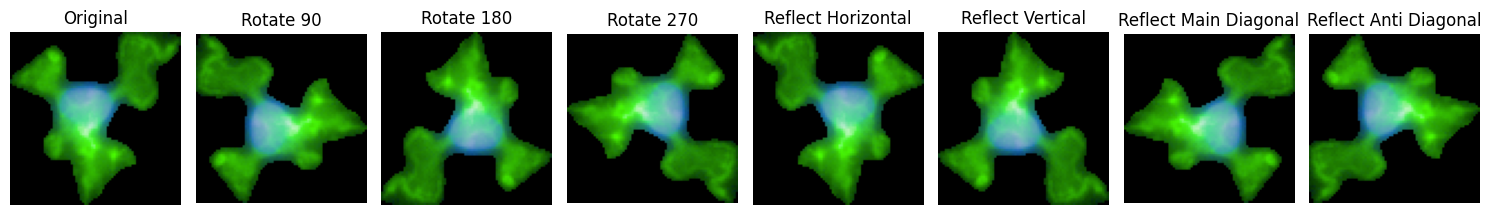

In [7]:
# Plot original image
plt.figure(figsize=(15, 8))
plt.subplot(1, len(transformations) + 1, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Apply transformations and plot
for i, op in enumerate(transformations, start=2):
    transformed_img = transformImg(img, op)
    plt.subplot(1, len(transformations) + 1, i)
    plt.imshow(transformed_img)
    plt.title(op.replace('_', ' ').title())
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
def loadPreprocessImages(indices, pathFolder):
    images = []
    target_size = (224, 224)  # Target size for images

    for idx in indices:
        imgPath = os.path.join(pathFolder, f'{idx}.png')
        img = load_img(imgPath)  # Load the original image without resizing

        # Resize the image to maintain aspect ratio with a max dimension of 224x224
        img.thumbnail(target_size, Image.ANTIALIAS)

        # Pad the image to be exactly 224x224
        img = ImageOps.pad(img, target_size, color="black")

        imgArray = img_to_array(img) / 255.0  # Normalize the image to have values between 0 and 1
        images.append(imgArray)

    return np.array(images)

def preprocessImg(img):
    target_size = (224, 224)  # Target size for images

    # Resize the image to maintain aspect ratio with a max dimension of 224x224
    img.thumbnail(target_size, Image.LANCZOS)

    # Pad the image to be exactly 224x224
    img = ImageOps.pad(img, target_size, color="black")

    imgArray = img_to_array(img) / 255.0  # Normalize the image
    return imgArray

In [11]:
input_folder = "allGoodCellPatchesWithNoBackgroundInfo"
output_folder = "allColourImagesAugmented"

# output folder created if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

file_list = os.listdir(input_folder)

In [12]:
idx = 0
# Iterate through each image file
for file_name in file_list:
    # Load the image
    img_path = os.path.join(input_folder, file_name)
    original_img = Image.open(img_path)

    # Preprocess the original image
    preprocessed_original = preprocessImg(original_img)
    # Save the original image
    original_img.save(os.path.join(output_folder, f"{idx}.png"))
    idx += 1

    # Apply transformations and save transformed images
    for transform_op in transformations:
        transformed_img = transformImgV2(img_path, transform_op)
        # Preprocess the transformed image
        preprocessed_transformed = preprocessImg(transformed_img)
        # Save the transformed image
        transformed_img.save(os.path.join(output_folder, f"{idx}.png"))
        idx += 1

In [16]:
def preprocessImgGrayscale(img):
    target_size = (224, 224)
    
    # Resize the image while maintaining aspect ratio
    img.thumbnail(target_size, Image.LANCZOS)
    
    # Pad the image to make it 224x224
    padded_img = ImageOps.pad(img, target_size, color="black")
    
    # Convert the image to a NumPy array
    img_array = np.array(padded_img)
    
    # Normalize the pixel values to range [0, 1]
    img_array = img_array / 255.0
    
    # If the image is grayscale, add a channel dimension
    if len(img_array.shape) == 2:
        img_array = np.expand_dims(img_array, axis=-1)
    
    return img_array

def saveImgGrayscale(img_array, file_path):
    # Convert the normalized NumPy array back to an image
    img = Image.fromarray((img_array * 255).astype(np.uint8)[:, :, 0])
    
    # Save the image
    img.save(file_path)

In [17]:
# Define the folder paths
input_folder = "allGoodCellPatchesBinMasks2"
output_folder = "AllMasksAugmented"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
file_list = os.listdir(input_folder)

In [18]:
idx = 0
# Iterate through each image file
for file_name in file_list:
    # Load the original image
    img_path = os.path.join(input_folder, file_name)
    original_img = Image.open(img_path)

    # Preprocess and save the original image
    preprocessed_original = preprocessImgGrayscale(original_img)
    saveImgGrayscale(preprocessed_original, os.path.join(output_folder, f"{idx}.png"))
    idx += 1

    # Apply transformations and save transformed images
    for transform_op in transformations:
        transformed_img = transformImgV2(img_path, transform_op)

        # Preprocess and save the transformed image
        preprocessed_transformed = preprocessImgGrayscale(transformed_img)
        saveImgGrayscale(preprocessed_transformed, os.path.join(output_folder, f"{idx}.png"))
        idx += 1

In [14]:
# Load the image
img_path = "allColourImagesAugmented/0.png"
img = Image.open(img_path)

# Convert the image to a NumPy array
img_array = np.array(img)

# Display the type of values
print("Type of values:", img_array.dtype)

Type of values: uint8


In [19]:
# Load the image
img_path = "allMasksAugmented/0.png"
img = Image.open(img_path)

# Convert the image to a NumPy array
img_array = np.array(img)

# Display the type of values
print("Type of values:", img_array.dtype)

Type of values: uint8
